## Detect Cyber Intrusion Using Machine Learning

### Task 1: Import Libraries and Modules

In [2]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.model_selection import train_test_split
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Task 2: Preprocess the Dataset

#### Load CSV file into a DataFrame

You’ll use the SIMARGL2021 dataset, which is designed to evaluate the performance of intrusion detection systems. This dataset contains data associated with four types of cyber attacks: SYN scan, XMAS scan, NULL scan, and FIN scan.

The dataset has 49 features and contains 1,047,597 network traffic flows. Here’s their breakdown:

603,114 network traffic flows are associated with benign traffic.

431,085 network traffic flows are associated with the SYN scan.

7,158 network traffic flows are associated with the XMAS scan.

6,060 network traffic flows are associated with the NULL scan.

180 network traffic flows are associated with the FIN scan.

In [3]:
data_frame = df = pd.read_csv('/usercode/SIMARGL2021.csv')

#### Display the first few rows of the CSV file


In [4]:
data_frame.shape

(1047597, 50)

In [5]:
data_frame.head()

,BIFLOW_DIRECTION,DIRECTION,DST_TO_SRC_SECOND_BYTES,FIREWALL_EVENT,FIRST_SWITCHED,FLOW_ACTIVE_TIMEOUT,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,...,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,SAMPLING_INTERVAL,TOTAL_FLOWS_EXP,LABEL
0,1,0,138,0,1622174400,120,682,0,1.622170e+12,1622174400,...,0,0,0,0,0,0,DNS,1,1365973,Normal flow
1,1,0,75,0,1622174400,120,579,0,1.622170e+12,1622174400,...,0,0,0,0,0,0,DNS,1,1365974,Normal flow
2,1,0,40,0,1622174400,120,213,0,1.622170e+12,1622174400,...,0,0,0,0,40,40,Unknown,1,1365976,Normal flow
3,1,0,166,0,1622174400,120,257,0,1.622170e+12,1622174400,...,0,0,0,0,0,0,DNS,1,1365978,Normal flow
4,1,0,",",0,1622174400,120,0,0,1.622170e+12,1622174400,...,0,0,0,0,196,0,ICMP,1,1365979,Normal flow


#### Select the 15 features

he SIMARGL2021 dataset contains 49 features. However, not all those features contribute significantly to attack detection. Therefore, select only the following 15 features from the list of 49 features: DST_TOS, SRC_TOS, TCP_WIN_SCALE_IN, TCP_WIN_SCALE_OUT, TCP_FLAGS, TCP_WIN_MAX_OUT, PROTOCOL, TCP_WIN_MIN_OUT, TCP_WIN_MIN_IN, TCP_WIN_MAX_IN, LAST_SWTICHED, TCP_WIN_MSS_IN, TOTAL_FLOWS_EXP, FIRST_SWITCHED, FLOW_DURATION_MILLISECONDS.


In [6]:
selected_columns = [
'DST_TOS', 'SRC_TOS', 'TCP_WIN_SCALE_OUT', 'TCP_WIN_SCALE_IN', 'TCP_FLAGS','TCP_WIN_MAX_OUT', 'PROTOCOL', 'TCP_WIN_MIN_OUT', 'TCP_WIN_MIN_IN','TCP_WIN_MAX_IN', 'LAST_SWITCHED', 'TCP_WIN_MSS_IN', 'TOTAL_FLOWS_EXP','FIRST_SWITCHED', 'FLOW_DURATION_MILLISECONDS', 'LABEL'
]
data_frame = data_frame[selected_columns]
data_frame.head()

,DST_TOS,SRC_TOS,TCP_WIN_SCALE_OUT,TCP_WIN_SCALE_IN,TCP_FLAGS,TCP_WIN_MAX_OUT,PROTOCOL,TCP_WIN_MIN_OUT,TCP_WIN_MIN_IN,TCP_WIN_MAX_IN,LAST_SWITCHED,TCP_WIN_MSS_IN,TOTAL_FLOWS_EXP,FIRST_SWITCHED,FLOW_DURATION_MILLISECONDS,LABEL
0,0,0,0,0,0,0,17,0,0,0,1622174400,0,1365973,1622174400,0,Normal flow
1,0,0,0,0,0,0,17,0,0,0,1622174400,0,1365974,1622174400,0,Normal flow
2,40,40,0,0,22,0,6,0,1024,1024,1622174400,0,1365976,1622174400,0,Normal flow
3,0,0,0,0,0,0,17,0,0,0,1622174400,0,1365978,1622174400,0,Normal flow
4,0,196,0,0,0,0,1,0,0,0,1622174400,0,1365979,1622174400,0,Normal flow


#### Remove duplicate rows

In [7]:
data_frame.drop_duplicates(inplace=True)

/tmp/ipykernel_147/1689651136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame.drop_duplicates(inplace=True)


In [8]:
data_frame.shape

(927840, 16)

### Task 3: Explore the Dataset

The number of total rows in the dataset

The different types of labels in the dataset

The number of instances/rows that belong to each label type

The types of attacks present in the dataset

#### Display each label and its count via a bar graph


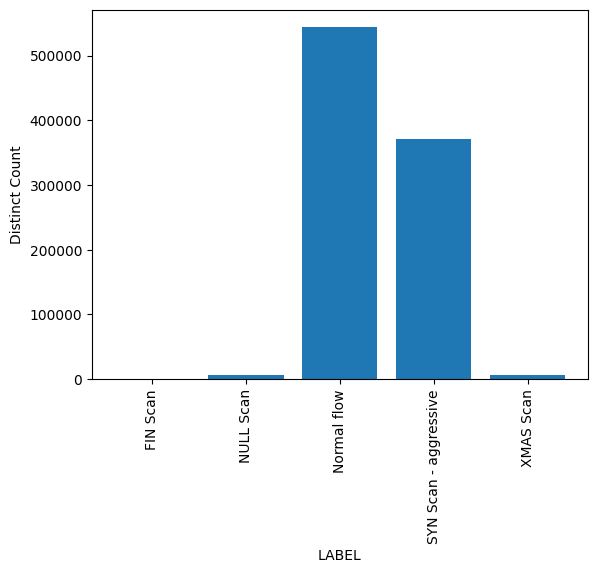

In [9]:
grouped_data = data_frame.groupby('LABEL').size()
fig, ax = plt.subplots(1)
ax.bar(grouped_data.index, grouped_data.values)
ax.set(xlabel='LABEL', ylabel='Distinct Count')
plt.xticks(rotation=90)
plt.show()

In [10]:
data_frame['LABEL'].value_counts()

LABEL
Normal flow              543710
SYN Scan - aggressive    370732
XMAS Scan                  7158
NULL Scan                  6060
FIN Scan                    180
Name: count, dtype: int64

#### Plot the distinct counts

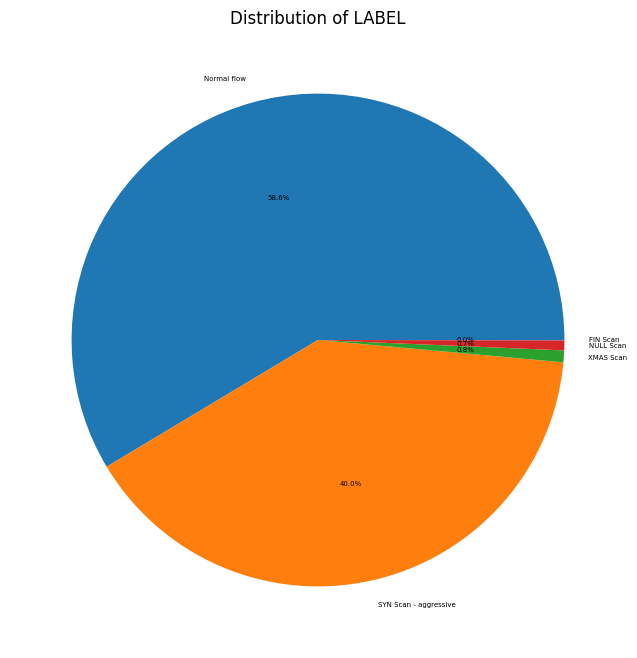

In [11]:
grouped_data = data_frame['LABEL'].value_counts()
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(grouped_data.values, labels=grouped_data.index, autopct='%1.1f%%', textprops={'fontsize': 5})
ax.set_title('Distribution of LABEL')
plt.show()

### Task 4: Standardize and Encode the Data

In the SIMARGL2021 dataset, several features (e.g., FLOW_ID and IN_BYTES) are numerical. You need to normalize these numerical features to ensure that all the features are on a similar scale. This can improve the performance of machine learning models that rely on numerical computations. Similarly, you also need to label and encode the nonnumerical features (e.g., protocol name) of the dataset.

To complete this task, perform the following steps:

Convert the nonnumerical features into a numerical format.

Once all the features are in numerical format, standardize/normalize all of them.

#### Create a copy of the data

In [12]:
normalized_data = data_frame.copy()
numerical_columns = normalized_data.select_dtypes(include=['float64', 'int64']).columns

In [13]:
numerical_columns

Index(['DST_TOS', 'SRC_TOS', 'TCP_WIN_SCALE_OUT', 'TCP_WIN_SCALE_IN',
       'TCP_FLAGS', 'TCP_WIN_MAX_OUT', 'PROTOCOL', 'TCP_WIN_MIN_OUT',
       'TCP_WIN_MIN_IN', 'TCP_WIN_MAX_IN', 'LAST_SWITCHED', 'TCP_WIN_MSS_IN',
       'TOTAL_FLOWS_EXP', 'FIRST_SWITCHED', 'FLOW_DURATION_MILLISECONDS'],
      dtype='object')

#### Extract the numerical columns to be normalized

In [14]:
non_numerical_columns = normalized_data.select_dtypes(exclude=['float64', 'int64']).columns

In [15]:
non_numerical_columns

Index(['LABEL'], dtype='object')

#### Extract the non-numerical columns to be label encoded

In [16]:
label_encoder = LabelEncoder()
normalized_data[non_numerical_columns] = normalized_data[non_numerical_columns].apply(label_encoder.fit_transform)

#### Standardize the numerical columns

In [17]:
scaler = StandardScaler() 
normalized_data[numerical_columns] = scaler.fit_transform(normalized_data[numerical_columns])

In [18]:
normalized_data.head()

,DST_TOS,SRC_TOS,TCP_WIN_SCALE_OUT,TCP_WIN_SCALE_IN,TCP_FLAGS,TCP_WIN_MAX_OUT,PROTOCOL,TCP_WIN_MIN_OUT,TCP_WIN_MIN_IN,TCP_WIN_MAX_IN,LAST_SWITCHED,TCP_WIN_MSS_IN,TOTAL_FLOWS_EXP,FIRST_SWITCHED,FLOW_DURATION_MILLISECONDS,LABEL
0,-0.202520,-0.275953,-0.304294,-0.340399,-1.094170,-0.296931,1.602891,-0.296429,-0.373770,-0.377188,0.798357,-1.065921,-0.822983,0.798359,-0.199755,2
1,-0.202520,-0.275953,-0.304294,-0.340399,-1.094170,-0.296931,1.602891,-0.296429,-0.373770,-0.377188,0.798357,-1.065921,-0.822982,0.798359,-0.199755,2
2,1.521307,0.913199,-0.304294,-0.340399,0.773889,-0.296931,-0.512673,-0.296429,-0.312306,-0.316160,0.798357,-1.065921,-0.822981,0.798359,-0.199755,2
3,-0.202520,-0.275953,-0.304294,-0.340399,-1.094170,-0.296931,1.602891,-0.296429,-0.373770,-0.377188,0.798357,-1.065921,-0.822980,0.798359,-0.199755,2
4,-0.202520,5.550894,-0.304294,-0.340399,-1.094170,-0.296931,-1.474293,-0.296429,-0.373770,-0.377188,0.798357,-1.065921,-0.822979,0.798359,-0.199755,2


### Task 5: Separate Labels and Split Data into Train and Test Subsets

Now that the dataset is normalized, you need to split it into two parts by extracting the target LABEL column. 

The first part will have all the columns of the data except the last column, i.e., the LABEL column. The second part will have only one column, i.e., the LABEL column.

After splitting the data based on columns, you then need to split the dataset into two parts: 70% for training and 30% for test
ing.

#### Separate data and labels

In [19]:
X = normalized_data.drop(columns=['LABEL'],axis=1)

Y = normalized_data['LABEL']

#### Split data into train and test subsets


In [20]:
X_train, X_test, y_train, y_test = train_test_split (X, Y, test_size=0.3, random_state=42)

### Task 6: Train Random Forest

Random forest is a powerful and widely used machine learning algorithm method, particularly suitable for classification and regression tasks. Random forest combines multiple decision trees to improve detection accuracy and reduce overfitting.

During the training process, the random forest classifier learns patterns and relationships in the training data. This learning is then used to make accurate predictions when presented with new unseen data.

Because you have already split the data into training and testing subsets, in this task, you’ll train the classifier using the training data and measure the training time.

#### Create a random forest classifier

In [21]:
rf_classifier = RandomForestClassifier(n_estimators=30)

#### Measure the training time

In [22]:
start_time = time.time() 
rf_classifier.fit(X_train, y_train)
end_time = time.time()
training_timeRFC = end_time - start_time

In [23]:
training_timeRFC

16.205549001693726

### Task 7: Test Random Forest

Make predictions on the test dataset.

Calculate the accuracy of the random forest classifier by comparing the predicted labels with the true labels.

Calculate the F1 score, which is the harmonic mean of precision and recall.

Calculate the precision score, which is the ratio of the positive predictions to total positive predictions.

Calculate the recall score, which is the ratio of true positive predictions to total actual positive instances.

#### Make predictions on the test set


In [24]:
y_pred = rf_classifier.predict(X_test)

In [25]:
y_pred

array([2, 3, 3, ..., 2, 3, 3])

#### Calculate and print the accuracy, F1 score, precision, and recall

In [26]:
accuracyRFC = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted') 
precision = precision_score(y_test, y_pred,average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')
print("Training time:", training_timeRFC)
print("Accuracy:", accuracyRFC)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Training time: 16.205549001693726
Accuracy: 0.9985988963614416
F1 Score: 0.9986036945672273
Precision: 0.9986091785916803
Recall: 0.9985988963614416


### Task 8: Train Decision Tree

The decision tree algorithm works by recursively partitioning the input data into subsets based on the values of input features. It’s a supervised learning algorithm that can be used for both classification and regression tasks.

In this task, you’ll train the decision tree classifier and measure the training time.

#### Create a DecisionTreeClassifier with criterion='entropy' and max_depth=4

In [27]:
dt_classifier = DecisionTreeClassifier(criterion='entropy',max_depth=4)

#### Measure the training time


In [28]:
start_time = time.time()
dt_classifier.fit(X_train, y_train)
end_time = time.time()
training_timeDT = end_time - start_time
training_timeDT

1.6994991302490234

### Task 9: Test Decision Tree

#### Make predictions on the test set

Test the decision tree classifier.

Measure the accuracy, F1 score, precision, and recall for the decision tree classifier.

In [29]:
y_pred = dt_classifier.predict(X_test)

In [30]:
pd.Series(y_pred).value_counts()

2    161842
3    111376
4      3173
1      1961
Name: count, dtype: int64

#### Calculate and print the accuracy, F1 score, precision, and recall

In [31]:
accuracyDT = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Training time:", training_timeDT)
print("Accuracy:", accuracyDT)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Training time: 1.6994991302490234
Accuracy: 0.9955056906363166
F1 Score: 0.995816927472435
Precision: 0.9966325907822287
Recall: 0.9955056906363166


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Task 10: Train Naive Bayes

Gaussian Naive Bayes (GNB) is a probabilistic machine learning algorithm based on Bayes’ theorem and the “naive” assumption of conditional independence between features. It’s particularly useful for classification tasks, where the goal is to assign an input data point to one of several predefined classes or categories.

To complete this task, perform the following steps:

Create an instance of a Gaussian Naive Bayes classifier.

Train the classifier by passing the training data.

Measure the training time.

#### Create a Gaussian Naive Bayes classifier

In [32]:
nb_classifier = GaussianNB()

#### Measure the training time

In [33]:
start_time = time.time()
nb_classifier.fit(X_train, y_train)
end_time = time.time()
training_timeNB = end_time - start_time
training_timeNB

0.28127312660217285

### Task 11: Test Naive Bayes

Test the Gaussian Naive Bayes classifier.

Measure the accuracy, F1 score, precision, and recall for the Naive Bayes classifier.

#### Make predictions on the test dataset

In [34]:
y_pred = nb_classifier.predict(X_test)

In [35]:
pd.Series(y_pred).value_counts()

2    160654
3    111372
4      4071
1      2213
0        42
Name: count, dtype: int64

#### Calculate and print the accuracy, F1 sore, precision, and recall

In [36]:
accuracyNB = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, 
average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("Training time:", training_timeNB)
print("Accuracy:", accuracyNB)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Training time: 0.28127312660217285
Accuracy: 0.9912089728114043
F1 Score: 0.9923627270670682
Precision: 0.9948001931044119
Recall: 0.9912089728114043


### Task 12: Compare the Accuracy and Training Times

Now that you’ve trained and tested three machine learning models (random forest, decision tree, and Naive Bayes), you need to compare them to determine which is the most accurate in detecting attacks. You also need to compare the training time of the three models because it’s essential to determine which model takes the least time to train.

For this, you need to perform the following steps:

Create two lists to store the accuracy scores and training times for the three different machine learning algorithms. These lists will be used to display the results in the form of bar plots later.

Create a list to store the names of the three algorithms: Random Forest, Decision Tree, and Gaussian Naive Bayes. These names will be used as labels on the x-axis of the bar plots.

Create a bar plot for accuracy. Set labels and titles for the bar plot.

Create a bar plot for training time. Set labels and titles for the bar plot.

#### Accuracy scores and training time of the three algorithms

In [37]:
accuracy_scores = [accuracyRFC, accuracyDT, accuracyNB]
train_times = [training_timeRFC, training_timeDT, training_timeNB]

#### Names of the algorithms

In [38]:
algorithm_names = ['Random Forest', 'Decision Tree', 'Gaussian Naive Bayes']

#### Create a bar plot for accuracy

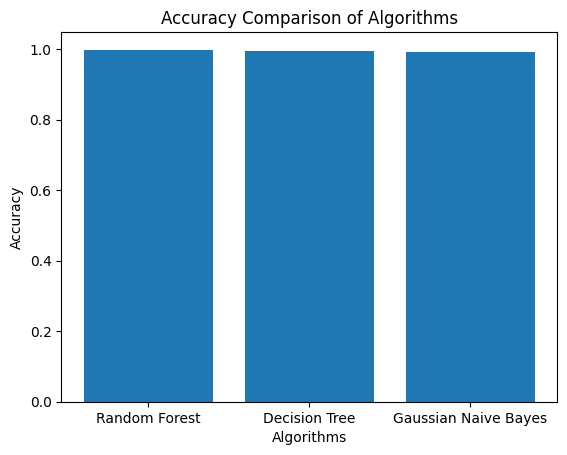

In [39]:
plt.bar(algorithm_names, accuracy_scores)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Algorithms')
plt.show()

#### Create a bar plot for training time

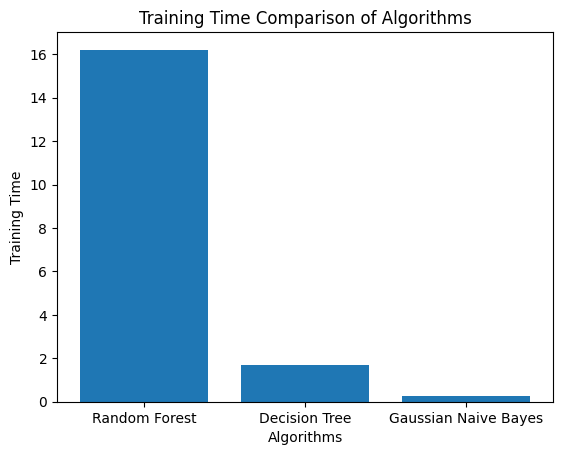

In [40]:
plt.bar(algorithm_names, train_times)
plt.xlabel('Algorithms')
plt.ylabel('Training Time')
plt.title('Training Time Comparison of Algorithms')
plt.show()